**Трофимов Михаил, ПМ22-1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage.filters.thresholding import threshold_otsu

## Задача 1 (сдано на семинаре)

Проведите экспетимент:
1. Создайте условную картинку - белый квадрат размером 30 на 30 пикселей на черном фоне картинки размерами 100 на 100 пикселей.
2. Создайте негатив этой картинки - черный квадрат на белом фоне.
3. К обоим картинкам примените операцию расширения.
4. К обоим картинкам примените операцию эрозии.
5. Сделайте выводы.

In [2]:
kernel = np.ones((5, 5), np.uint8)

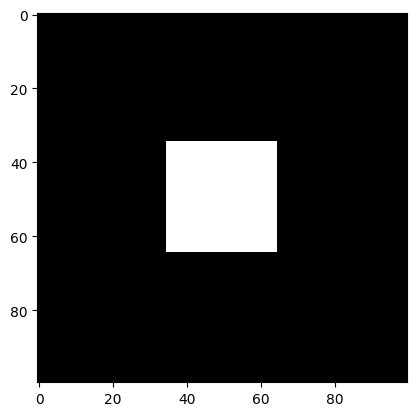

In [3]:
image_size = (100, 100)
image = np.zeros(image_size, dtype=np.uint8)
square_size = 30
square_start = (35, 35)
image[square_start[0]:square_start[0] + square_size, square_start[1]:square_start[1] + square_size] = 255

plt.imshow(image, cmap = 'gray')
plt.show()

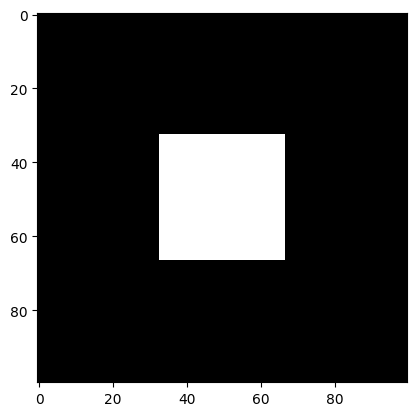

In [4]:
dilation = cv2.dilate(image, kernel)
plt.imshow(dilation, cmap = 'gray')
plt.show()

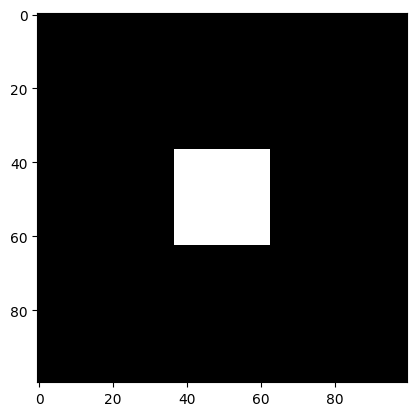

In [5]:
erosion = cv2.erode(image, kernel)
plt.imshow(erosion, cmap = 'gray')
plt.show()

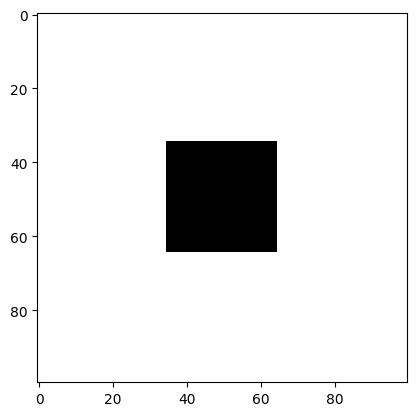

In [6]:
img_inv = 255 - image
plt.imshow(img_inv, cmap = 'gray')
plt.show()

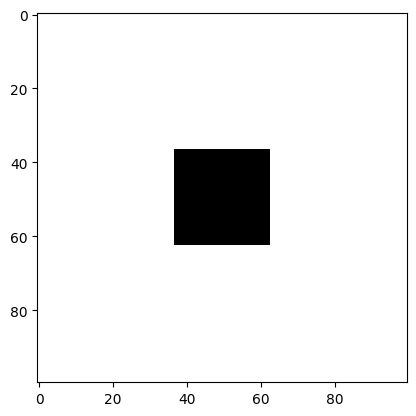

In [7]:
dilation = cv2.dilate(img_inv, kernel)
plt.imshow(dilation, cmap = 'gray')
plt.show()

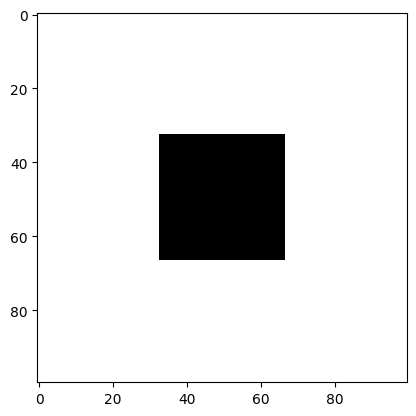

In [8]:
erosion = cv2.erode(img_inv, kernel)
plt.imshow(erosion, cmap = 'gray')
plt.show()

## Задача 2 (сдано на семинаре)

Заполнить отверстия внутри объектов на бинарном изображении. Подберите подходящую картинку самостоятельно.

Можно использовать картинки [1](https://drive.google.com/file/d/1Yp_7FdzL3Ou6N10cEiS3MZJUcNmBg4FE/view?usp=drive_link) [2](https://drive.google.com/file/d/1fniVuHygcJNaRe2WgBRgtQ4VtZjZyYnI/view?usp=drive_link) [3](https://drive.google.com/file/d/11yjAyf6Ddbb4wDv7_WyiYRCWchmOyqC6/view?usp=drive_link) [4](https://drive.google.com/file/d/1B60nmOzS17uvOJD6uvS0aHJv0AWeSez9/view?usp=drive_link) Или подобрать подходящую картинку самостоятельно.

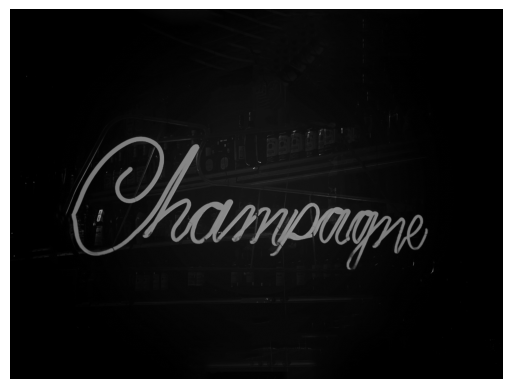

In [9]:
image = cv2.imread('text4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

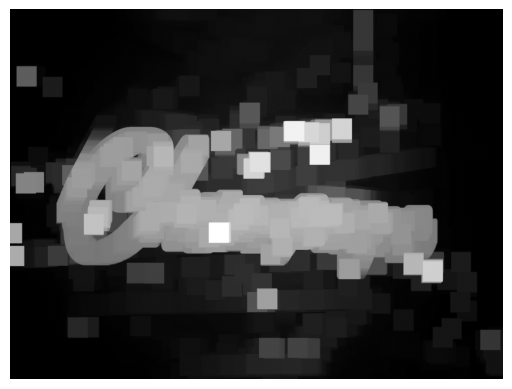

In [10]:
dilation = cv2.dilate(image, kernel, iterations = 40)
plt.imshow(dilation, cmap = 'gray')
plt.axis('off')
plt.show()

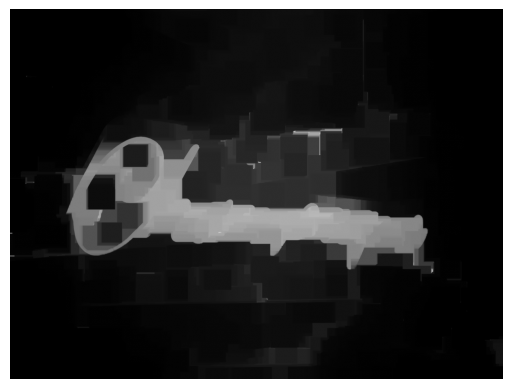

In [11]:
opening = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations = 40)
plt.imshow(opening, cmap = 'gray')
plt.axis('off')
plt.show()

## Задача 3 (сдано на семинаре)

Разделить сросшиеся объекты на бинарном изображении с использованием морфологических операций. Подберите подходящую картинку самостоятельно.

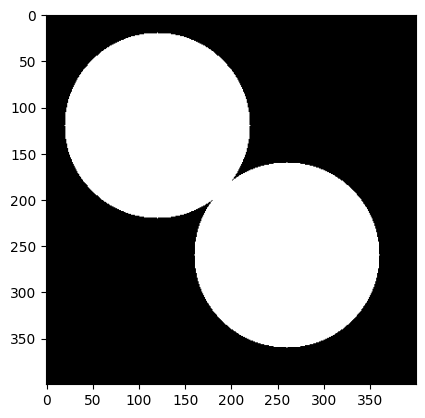

In [12]:
image = np.zeros((400, 400), dtype=np.uint8)
center1 = (120, 120)
center2 = (260, 260)
radius = 100
cv2.circle(image, center1, radius, 255, -1)
cv2.circle(image, center2, radius, 255, -1)

plt.imshow(image, cmap = 'gray')
plt.show()

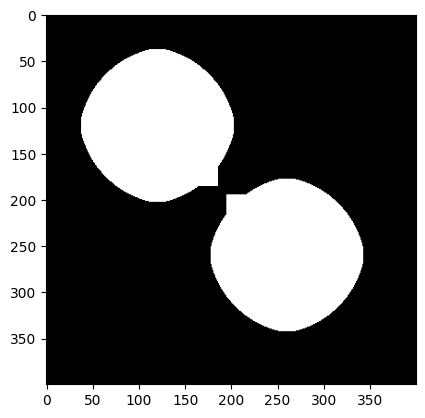

In [13]:
kernel = np.ones((3, 3), np.uint8)
im = cv2.erode(image, kernel, iterations = 20)
im = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel, iterations = 10)
im = cv2.dilate(im, kernel, iterations = 5)
plt.imshow(im, cmap = 'gray')
plt.show()

## Задача 4 (сдано на семинаре)

Подберите подходящее для сегментации изображение в полутонах. Сегментируйте изображение, подобрав порог исходя из гистограммы.

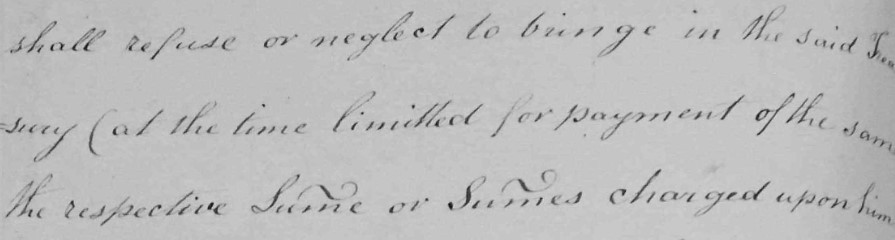

In [14]:
image = cv2.imread('cursive-snippet.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

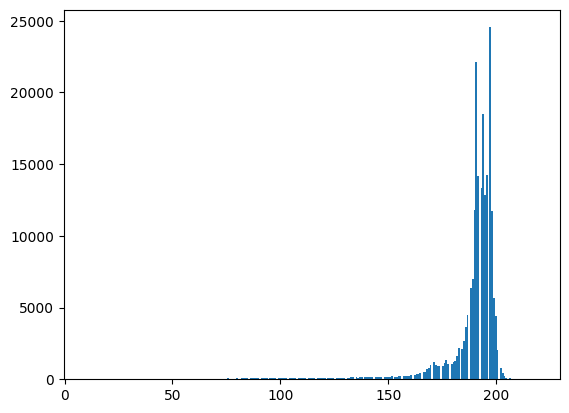

In [15]:
plt.hist(image.flatten(), 256)
plt.show()

In [16]:
threshold_otsu(image)

153

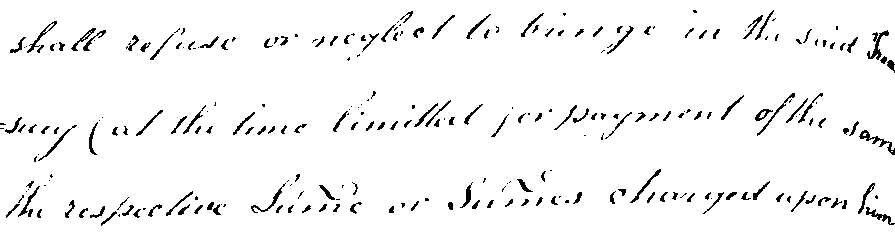

In [17]:
im = 255 * (image > 153)
cv2_imshow(im)

## Задача 5 (сдано на семинаре)

Сегментировать изображение на основе анализа гистограммы цветовых каналов (RGB).

Для этого:
1. Разделить изображение на цветовые каналы.
2. Построить гистограммы для каждого канала.
3. Найти пороги для каждого канала (например взять порог по Оцу).
4. Выбрать более-менее подходящее значение порога для изображения исходя из порогов по каналам.
5. Визуализировать результат бинаризации на исходном цветном изображении.



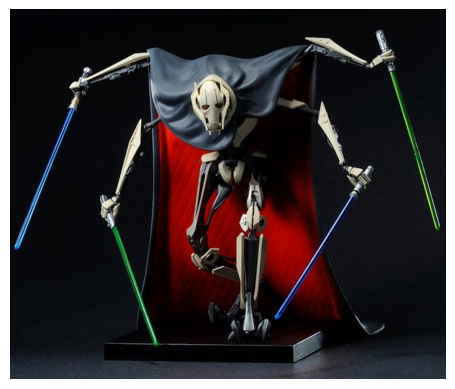

In [18]:
img = cv2.imread('Grivus.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

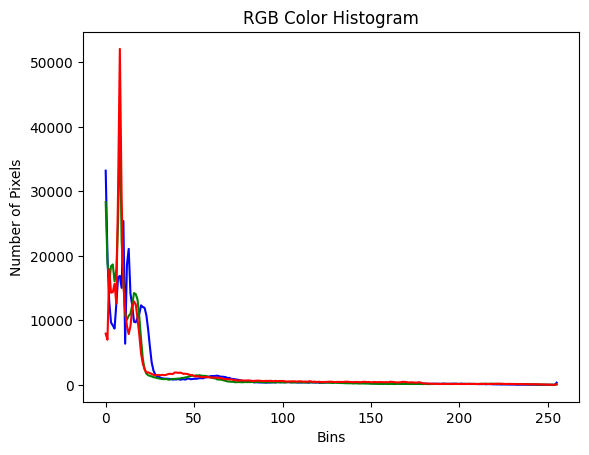

In [19]:
colors = ('blue', 'green', 'red')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color = color)
plt.title('RGB Color Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of Pixels')
plt.show()

In [20]:
threshold_otsu(img[:, :, 0]), threshold_otsu(img[:, :, 1]), threshold_otsu(img[:, :, 2])

(77, 78, 78)

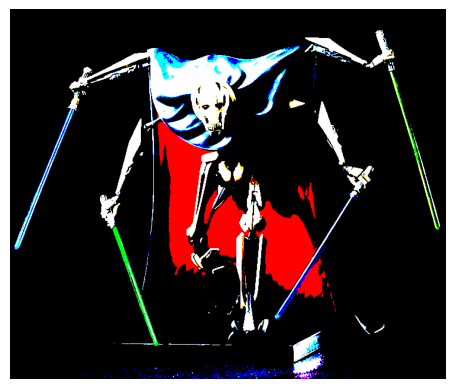

In [21]:
img[:, :, 0] = 255 * (img[:, :, 0] > 77)
img[:, :, 1] = 255 * (img[:, :, 1] > 78)
img[:, :, 2] = 255 * (img[:, :, 2] > 78)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

##Задача 6

С помощью частотных методов выделить на изображении более плавные переходы, размытости и фон, приглушить резкие переходы и границы. Описать что это за фильтр.

Подобрать подходящую картинку самостоятельно.

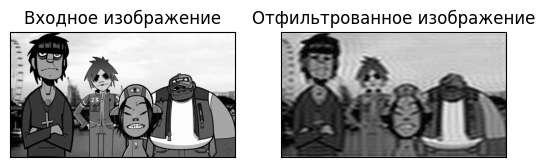

In [22]:
image = cv2.imread('gorillaz.jpg', 0)

f_transform = np.fft.fft2(image)

f_transform_shifted = np.fft.fftshift(f_transform)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Фильтр низких частот - для выделения размытых областей
mask = np.zeros((rows, cols), np.uint8) # Нули по умолчанию
mask[crow-30:crow+30, ccol-30:ccol+30] = 1 # Сохраняем низкие частоты

f_transform_filtered = f_transform_shifted * mask

f_transform_filtered_shifted = np.fft.ifftshift(f_transform_filtered)

image_filtered = np.fft.ifft2(f_transform_filtered_shifted)

image_filtered = np.abs(image_filtered)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Входное изображение'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.title('Отфильтрованное изображение'), plt.xticks([]), plt.yticks([])

plt.show()

##Задача 7

С помощью частотных методов приглушить на изображении более плавные переходы, размытости и фон, выделить резкие переходы и границы. Описать что это за фильтр.

Подобрать подходящую картинку самостоятельно.

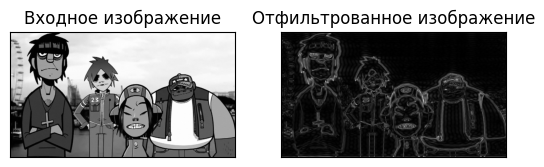

In [23]:
image = cv2.imread('gorillaz.jpg', 0)

f_transform = np.fft.fft2(image)

f_transform_shifted = np.fft.fftshift(f_transform)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Фильтр высоких частот - для выделения границ
mask = np.ones((rows, cols), np.uint8) # Единицы по умолчанию
mask[crow-30:crow+30, ccol-30:ccol+30] = 0 # Удаляем низкие частоты

f_transform_filtered = f_transform_shifted * mask

f_transform_filtered_shifted = np.fft.ifftshift(f_transform_filtered)

image_filtered = np.fft.ifft2(f_transform_filtered_shifted)

image_filtered = np.abs(image_filtered)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Входное изображение'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.title('Отфильтрованное изображение'), plt.xticks([]), plt.yticks([])

plt.show()